In [2]:
import os
import torch
import torchaudio
from torchaudio.datasets import SPEECHCOMMANDS

import matplotlib.pyplot as plt
from tqdm import tqdm

In [3]:
# https://pytorch.org/tutorials/intermediate/speech_command_classification_with_torchaudio_tutorial.html
# Dataset:
#   https://ai.googleblog.com/2017/08/launching-speech-commands-dataset.html
#   https://pytorch.org/audio/stable/generated/torchaudio.datasets.SPEECHCOMMANDS.html#torchaudio.datasets.SPEECHCOMMANDS


# tutorial https://pytorch.org/tutorials/intermediate/speech_command_classification_with_torchaudio_tutorial.html

In [3]:
class SubsetSC(SPEECHCOMMANDS):
    def __init__(self, subset: str = None):
        super().__init__("../data/", download=True)

        def load_list(filename):
            filepath = os.path.join(self._path, filename)
            with open(filepath) as fileobj:
                return [os.path.normpath(os.path.join(self._path, line.strip())) for line in fileobj]
    
        if subset == "validation":
            self._walker = load_list("validation_list.txt")
        elif subset == "testing":
            self._walker = load_list("testing_list.txt")
        elif subset == "training":
            excludes = load_list("validation_list.txt") + load_list("testing_list.txt")
            excludes = set(excludes)
            self._walker = [w for w in self._walker if w not in excludes]


In [4]:
train_set = SubsetSC("training")
test_set = SubsetSC("testing")

In [5]:
waveform, sample_rate, label, speaker_id, utterance_number = train_set[0]

In [6]:
label

'backward'

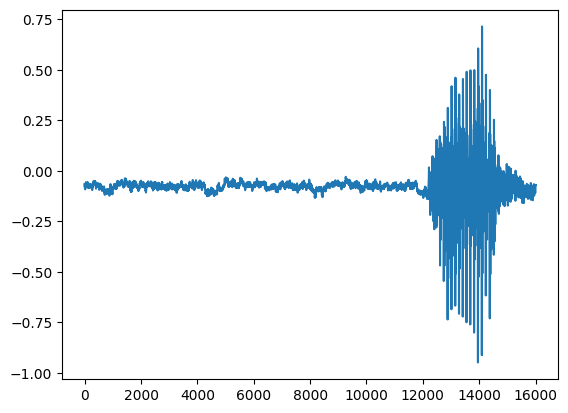

In [7]:
plt.plot(waveform.t().numpy())

In [10]:
waveform.shape


torch.Size([1, 16000])

In [ ]:
# Check the similarity between pytorch transforms and the c++ implementation from tensorflow
#  in running the c++ programm on a known sample of the dataset